In [3]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial.polynomial import Polynomial
import pickle
from scipy import interpolate
from scipy.interpolate import lagrange
from scipy.interpolate import BSpline

In [4]:
radii = [0.075, 0.0875, 0.1, 0.1125, 0.125, 0.1375, 0.15, 0.1625, 0.175, 0.1875, 0.2, 0.2125, 0.225, 0.2375, 0.25]
phase_list = [-3.00185845, -2.89738421, -2.7389328, -2.54946247, -2.26906522, -1.89738599, -1.38868364, -0.78489682, -0.05167712, 0.63232107, 1.22268106, 1.6775137, 2.04169308, 2.34964137, 2.67187105]

radii = np.asarray(radii)
phase_list = np.asarray(phase_list)

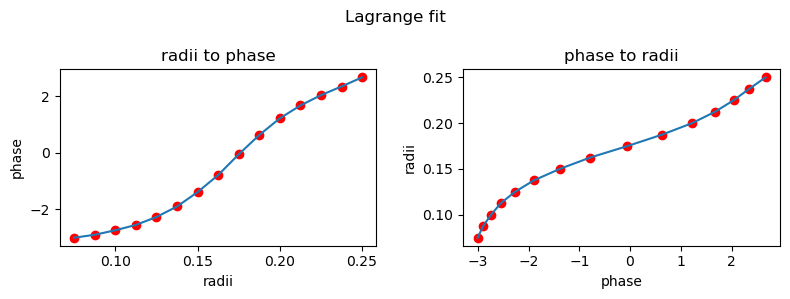

In [5]:
# lagrangian mapping function

poly = lagrange(radii, phase_list)
poly2 = lagrange(phase_list, radii)

fig, ax = plt.subplots(1,2, figsize=(8,3))

fig.suptitle("Lagrange fit")
ax[0].scatter(radii, phase_list, c = 'r')
ax[0].plot(radii, Polynomial(poly.coef[::-1])(radii), label='Polynomial')
ax[0].set_xlabel("radii")
ax[0].set_ylabel("phase")
ax[0].set_title("radii to phase")

ax[1].scatter(phase_list, radii, c = 'r')
ax[1].plot(phase_list, Polynomial(poly2.coef[::-1])(phase_list), label='Polynomial')
ax[1].set_xlabel("phase")
ax[1].set_ylabel("radii")
ax[1].set_title("phase to radii")

fig.tight_layout()

radii_to_phase = poly.coef[::-1] # these are coefficients of the polynomials. they are the slope of the curve at one of the 15 terms of the lagrange equation
phase_to_radii = poly2.coef[::-1] # these are coefficients of the polynomials. they are the slope of the curve at one of the 15 terms of the lagrange equation

# filename = "radii_to_phase.pkl"
# with open(filename,"wb") as f:
#     pickle.dump(radii_to_phase,f)

In [6]:
test_radii = np.random.uniform(0.07, 0.28, size=50)

In [7]:
to_phase = []
for radius in test_radii:
    to_phase.append(Polynomial(radii_to_phase)(radius))

(-6.0, 6.0)

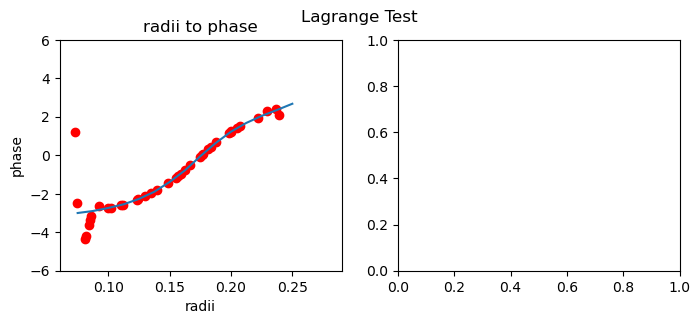

In [8]:
plt.close("all")

fig, ax = plt.subplots(1,2, figsize=(8,3))

fig.suptitle("Lagrange Test")
ax[0].scatter(test_radii, to_phase, c = 'r')
ax[0].plot(radii, Polynomial(poly.coef[::-1])(radii), label='Polynomial')
ax[0].set_xlabel("radii")
ax[0].set_ylabel("phase")
ax[0].set_title("radii to phase")
ax[0].set_ylim([-6,6])

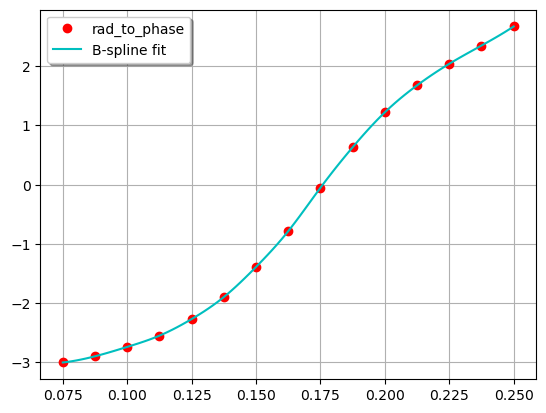

In [9]:
### B-splines ###

#p_list = [[radii,phase] for radii, phase in zip(radii,phase_list)]

tck = interpolate.splrep(radii, phase_list, s=0, k=3)
x_new = np.linspace(radii[0], radii[-1], 100)
y_fit = interpolate.BSpline(*tck)(x_new)

tck_ = interpolate.splrep(phase_list, radii, s=0, k=3)
x_new_ = np.linspace(phase_list[0], phase_list[-1], 100)
y_fit_ = interpolate.BSpline(*tck_)(x_new_)

plt.plot(radii,phase_list, 'ro', label="rad_to_phase")
plt.plot(x_new, y_fit, '-c', label="B-spline fit")
plt.legend(loc="best",fancybox=True, shadow=True)
plt.grid()

In [10]:
min_rad=0.07
max_rad=0.3

min_phi = -3.14
max_phi = 3.14
test_radii = np.random.uniform(min_rad, max_rad, size=50)
test_phase = np.random.uniform(min_phi, max_phi, size=50)

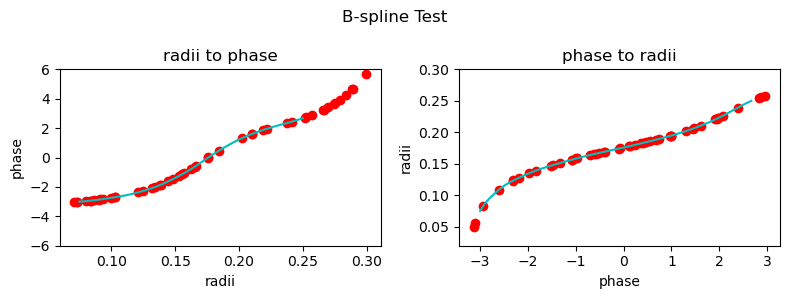

In [11]:
plt.close("all")

fig, ax = plt.subplots(1,2, figsize=(8,3))

to_phase = []
for radius in test_radii:
    to_phase.append(interpolate.splev(test_radii,tck))
to_phase = np.asarray(to_phase)

to_radii = []
for phase in test_phase:
    to_radii.append(interpolate.splev(test_phase,tck_))
to_radii = np.asarray(to_radii)

fig.suptitle("B-spline Test")
ax[0].scatter(test_radii, to_phase[0], c = 'r')
ax[0].plot(x_new, y_fit, '-c', label="B-spline fit")
ax[0].set_xlabel("radii")
ax[0].set_ylabel("phase")
ax[0].set_title("radii to phase")
ax[0].set_ylim([-6,6])

ax[1].scatter(test_phase, to_radii[0], c = 'r')
ax[1].plot(x_new_, y_fit_, '-c', label="B-spline fit")
ax[1].set_xlabel("phase")
ax[1].set_ylabel("radii")
ax[1].set_title("phase to radii")
ax[1].set_ylim([min_rad-0.05,max_rad])

fig.tight_layout()

#to_phase[0].shape

In [12]:
test_radii

array([0.0728361 , 0.20226754, 0.24136695, 0.21038453, 0.26623204,
       0.13871211, 0.13420171, 0.25256157, 0.14848045, 0.26543699,
       0.15290092, 0.09947754, 0.09070007, 0.18412044, 0.16212485,
       0.08003031, 0.21004478, 0.08351104, 0.17600852, 0.0710995 ,
       0.2887482 , 0.16595394, 0.25168676, 0.10274121, 0.1030142 ,
       0.13820863, 0.21905056, 0.28891602, 0.29943023, 0.08441149,
       0.09354332, 0.12061544, 0.12486853, 0.27425904, 0.17565945,
       0.2753486 , 0.22174962, 0.09133164, 0.27872247, 0.13194754,
       0.15521956, 0.25710479, 0.16541599, 0.08648789, 0.15677257,
       0.2696666 , 0.14455101, 0.07305483, 0.23743509, 0.28408514])

In [13]:
test_phase

array([ 0.55925537,  0.36315079,  1.96873601,  0.98875775,  1.47740976,
       -1.48696445, -0.98646073,  2.87725522,  2.38491195,  2.83602587,
       -0.58827201, -1.32327258, -0.50943331,  0.13935482, -1.98165493,
       -2.61150754, -1.0738779 , -0.07414002,  0.46715662, -1.07725808,
       -2.93562051,  0.11243575, -0.10148399,  0.96612966, -0.62085189,
        1.31442486,  0.40729429, -0.39737675,  0.24412119,  1.92057177,
       -2.19118761,  0.74921159,  2.07657158,  0.98382768, -3.13528875,
       -1.52833698,  1.95451069, -2.30657181, -0.71186897,  1.45636724,
       -1.83274942,  0.67069638, -3.10432602, -0.98563378, -0.41670438,
       -2.30829203,  1.60913309,  0.98895888,  2.9667067 ,  1.97624348])

In [14]:
to_phase[0]

array([-3.01071503,  1.3149212 ,  2.44393589,  1.60840455,  3.24759516,
       -1.85374663, -2.00804332,  2.7471863 , -1.45561007,  3.21283252,
       -1.25863042, -2.74597037, -2.85992825,  0.45600412, -0.80525071,
       -2.96956868,  1.59706996, -2.93902226,  0.00703925, -3.01536951,
        4.65661006, -0.58974451,  2.7209621 , -2.70171327, -2.69795145,
       -1.87206928,  1.87745023,  4.67082335,  5.69712658, -2.93018901,
       -2.82437167, -2.37747169, -2.27243971,  3.64858736, -0.01320517,
        3.71072904,  1.95394742, -2.85219202,  3.91617533, -2.07761734,
       -1.1515412 ,  2.89300684, -0.62092168, -2.90853488, -1.07768172,
        3.4075576 , -1.6238641 , -3.00997028,  2.34807709,  4.28649658])

In [15]:
to_radii[0]

array([0.18609504, 0.18239628, 0.22227049, 0.1946876 , 0.206622  ,
       0.14782603, 0.15856074, 0.25617863, 0.23895387, 0.25510381,
       0.16602939, 0.15143181, 0.16737787, 0.1783254 , 0.13493105,
       0.1086924 , 0.1567635 , 0.17461897, 0.18434412, 0.15669311,
       0.08350383, 0.17784795, 0.17415781, 0.1942051 , 0.1654628 ,
       0.20227709, 0.183219  , 0.16925401, 0.18020933, 0.22053647,
       0.12784037, 0.18977992, 0.22635032, 0.19458207, 0.04941518,
       0.14689432, 0.22175291, 0.12359692, 0.16384409, 0.20603908,
       0.13934344, 0.18824334, 0.05655894, 0.15857752, 0.16893287,
       0.12353173, 0.21042241, 0.19469191, 0.2581684 , 0.22254553])

In [16]:
test_phases = [-2.9415116, 0.8770713, 2.627954, 0.00892277, -1.2216738, -2.812234, 0.15758653, -0.21446396, -0.9111282]

In [21]:
to_radii = []
for phase in test_phases:
    to_radii.append(interpolate.splev(test_phases,tck_))
to_radii = np.asarray(to_radii)

In [22]:
to_radii[0]

array([0.0828346 , 0.19234859, 0.24844833, 0.17603866, 0.15363326,
       0.09474286, 0.17865034, 0.17227552, 0.16006954])